## Import matplotlib using the notebook backend

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

th = np.linspace(0, 2*np.pi, 1024)

<IPython.core.display.Javascript object>


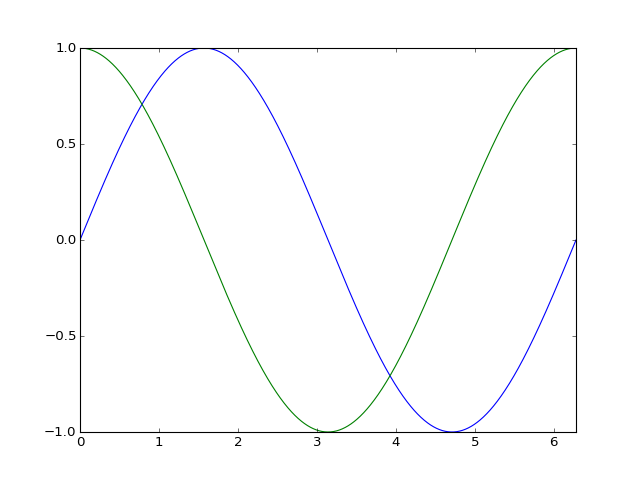

In [2]:
fig, ax = plt.subplots(1, 1)
ln_sin, = ax.plot(th, np.sin(th))
ln_cos, = ax.plot(th, np.cos(th))
ax.set_xlim(0, 2*np.pi);

In [14]:
ln_sin.set_color('r')
ln_sin.set_linewidth(5)
plt.draw()

## Demonstation of user interaction events

In [ ]:
import itertools
fig, ax = plt.subplots()
x = np.linspace(0,10,10000)
y = np.sin(x)
ln, = ax.plot(x,y)
evt = []
colors = iter(itertools.cycle(['r', 'g', 'b', 'k', 'c']))
def on_event(event):
    if event.name.startswith('key'):
        fig.suptitle('%s: %s' % (event.name, event.key))
    elif event.name == 'scroll_event':
        fig.suptitle('%s: %s' % (event.name, event.step))
    else:
        fig.suptitle('%s: %s' % (event.name, event.button))
    evt.append(event)
    ln.set_color(next(colors))
    fig.canvas.draw()
    fig.canvas.draw_idle()

fig.canvas.mpl_connect('button_press_event', on_event)
fig.canvas.mpl_connect('button_release_event', on_event)
fig.canvas.mpl_connect('scroll_event', on_event)
fig.canvas.mpl_connect('key_press_event', on_event)
fig.canvas.mpl_connect('key_release_event', on_event)

plt.show()

## mplot3D works

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, alpha=.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

## Animation example

In [ ]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c
import scipy
from numpy import sin, cos, pi, array
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G =  9.8 # acceleration due to gravity, in m/s^2
L1 = 1.0 # length of pendulum 1 in m
L2 = 1.0 # length of pendulum 2 in m
M1 = 1.0 # mass of pendulum 1 in kg
M2 = 1.0 # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2]-state[0]
    den1 = (M1+M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_)
               + M2*G*sin(state[2])*cos(del_) + M2*L2*state[3]*state[3]*sin(del_)
               - (M1+M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_)
               + (M1+M2)*G*sin(state[0])*cos(del_)
               - (M1+M2)*L1*state[1]*state[1]*sin(del_)
               - (M1+M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

rad = pi/180

# initial state
state = np.array([th1, w1, th2, w2])*pi/180.

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:,0])
y1 = -L1*cos(y[:,0])

x2 = L2*sin(y[:,2]) + x1
y2 = -L2*cos(y[:,2]) + y1
#with plt.xkcd():
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
    interval=100, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
plt.show()


## Rich user interaction

Selector demo http://matplotlib.org/examples/event_handling/lasso_demo.html

In [ ]:
"""
Show how to use a lasso to select a set of points and get the indices
of the selected points.  A callback is used to change the color of the
selected points

This is currently a proof-of-concept implementation (though it is
usable as is).  There will be some refinement of the API.
"""
from matplotlib.widgets import Lasso
from matplotlib.colors import colorConverter
from matplotlib.collections import RegularPolyCollection
from matplotlib import path

import matplotlib.pyplot as plt
from numpy import nonzero
from numpy.random import rand

class Datum(object):
    colorin = colorConverter.to_rgba('red')
    colorout = colorConverter.to_rgba('blue')
    def __init__(self, x, y, include=False):
        self.x = x
        self.y = y
        if include: self.color = self.colorin
        else: self.color = self.colorout


class LassoManager(object):
    def __init__(self, ax, data):
        self.axes = ax
        self.canvas = ax.figure.canvas
        self.data = data

        self.Nxy = len(data)

        facecolors = [d.color for d in data]
        self.xys = [(d.x, d.y) for d in data]
        fig = ax.figure
        self.collection = RegularPolyCollection(
            fig.dpi, 6, sizes=(100,),
            facecolors=facecolors,
            offsets = self.xys,
            transOffset = ax.transData)

        ax.add_collection(self.collection)

        self.cid = self.canvas.mpl_connect('button_press_event', self.onpress)

    def callback(self, verts):
        facecolors = self.collection.get_facecolors()
        p = path.Path(verts)
        ind = p.contains_points(self.xys)
        for i in range(len(self.xys)):
            if ind[i]:
                facecolors[i] = Datum.colorin
            else:
                facecolors[i] = Datum.colorout

        self.canvas.draw_idle()
        self.canvas.widgetlock.release(self.lasso)
        del self.lasso

    def onpress(self, event):
        if self.canvas.widgetlock.locked(): return
        if event.inaxes is None: return
        self.lasso = Lasso(event.inaxes, (event.xdata, event.ydata), self.callback)
        # acquire a lock on the widget drawing
        self.canvas.widgetlock(self.lasso)



data = [Datum(*xy) for xy in rand(100, 2)]
fig, ax = plt.subplots()

lman = LassoManager(ax, data)

plt.show()

Mandlebrot paired-zoom example: http://matplotlib.org/examples/event_handling/viewlims.html

In [ ]:
# Creates two identical panels.  Zooming in on the right panel will show
# a rectangle in the first panel, denoting the zoomed region.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# We just subclass Rectangle so that it can be called with an Axes
# instance, causing the rectangle to update its shape to match the
# bounds of the Axes
class UpdatingRect(Rectangle):
    def __call__(self, ax):
        self.set_bounds(*ax.viewLim.bounds)
        ax.figure.canvas.draw_idle()

# A class that will regenerate a fractal set as we zoom in, so that you
# can actually see the increasing detail.  A box in the left panel will show
# the area to which we are zoomed.
class MandlebrotDisplay(object):
    def __init__(self, h=500, w=500, niter=50, radius=2., power=2):
        self.height = h
        self.width = w
        self.niter = niter
        self.radius = radius
        self.power = power

    def __call__(self, xstart, xend, ystart, yend):
        self.x = np.linspace(xstart, xend, self.width)
        self.y = np.linspace(ystart, yend, self.height).reshape(-1,1)
        c = self.x + 1.0j * self.y
        threshold_time = np.zeros((self.height, self.width))
        z = np.zeros(threshold_time.shape, dtype=np.complex)
        mask = np.ones(threshold_time.shape, dtype=np.bool)
        for i in range(self.niter):
            z[mask] = z[mask]**self.power + c[mask]
            mask = (np.abs(z) < self.radius)
            threshold_time += mask
        return threshold_time

    def ax_update(self, ax):
        ax.set_autoscale_on(False) # Otherwise, infinite loop

        #Get the number of points from the number of pixels in the window
        dims = ax.axesPatch.get_window_extent().bounds
        self.width = int(dims[2] + 0.5)
        self.height = int(dims[2] + 0.5)

        #Get the range for the new area
        xstart,ystart,xdelta,ydelta = ax.viewLim.bounds
        xend = xstart + xdelta
        yend = ystart + ydelta

        # Update the image object with our new data and extent
        im = ax.images[-1]
        im.set_data(self.__call__(xstart, xend, ystart, yend))
        im.set_extent((xstart, xend, ystart, yend))
        ax.figure.canvas.draw_idle()

md = MandlebrotDisplay()
Z = md(-2., 0.5, -1.25, 1.25)

fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(Z, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()), cmap='YlGnBu')
ax2.imshow(Z, origin='lower', extent=(md.x.min(), md.x.max(), md.y.min(), md.y.max()), cmap='YlGnBu')

rect = UpdatingRect([0, 0], 0, 0, facecolor='None', edgecolor='black', lw=2)
rect.set_bounds(*ax2.viewLim.bounds)
ax1.add_patch(rect)

# Connect for changing the view limits
ax2.callbacks.connect('xlim_changed', rect)
ax2.callbacks.connect('ylim_changed', rect)

ax2.callbacks.connect('xlim_changed', md.ax_update)
ax2.callbacks.connect('ylim_changed', md.ax_update)

plt.show()


## XKCD plots

In [ ]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([-0.125, 1.0 - 0.125], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()